In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [2]:
books = pd.read_csv("book.csv")
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [11]:
frequent_itemsets = apriori(books, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [13]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [14]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [15]:
#To eliminate Redudancy in Rules
def to_list(i):
    return (sorted(list(i)))

In [16]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [17]:
ma_X

0           [ChildBks, YouthBks]
1           [YouthBks, ChildBks]
2            [ChildBks, CookBks]
3            [CookBks, ChildBks]
4           [ChildBks, DoItYBks]
                 ...            
95    [ArtBks, GeogBks, CookBks]
96    [CookBks, GeogBks, ArtBks]
97    [ArtBks, CookBks, GeogBks]
98    [CookBks, ArtBks, GeogBks]
99    [GeogBks, ArtBks, CookBks]
Length: 100, dtype: object

In [18]:
ma_X = ma_X.apply(sorted)

In [19]:
ma_X

0           [ChildBks, YouthBks]
1           [ChildBks, YouthBks]
2            [ChildBks, CookBks]
3            [ChildBks, CookBks]
4           [ChildBks, DoItYBks]
                 ...            
95    [ArtBks, CookBks, GeogBks]
96    [ArtBks, CookBks, GeogBks]
97    [ArtBks, CookBks, GeogBks]
98    [ArtBks, CookBks, GeogBks]
99    [ArtBks, CookBks, GeogBks]
Length: 100, dtype: object

In [20]:
rules_sets = list(ma_X)

In [21]:
rules_sets

[['ChildBks', 'YouthBks'],
 ['ChildBks', 'YouthBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ArtBks', 'ChildBks'],
 ['ArtBks', 'ChildBks'],
 ['ChildBks', 'GeogBks'],
 ['ChildBks', 'GeogBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'YouthBks'],
 ['DoItYBks', 'YouthBks'],
 ['DoItYBks', 'YouthBks'],
 ['ArtBks', 'YouthBks'],
 ['ArtBks', 'YouthBks'],
 ['GeogBks', 'YouthBks'],
 ['GeogBks', 'YouthBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'RefBks'],
 ['ArtBks', 'CookBks'],
 ['ArtBks', 'CookBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'ItalCook'],
 ['CookBks', 'ItalCook'],
 ['DoItYBks', 'RefBks'],
 ['DoItYBks', 'RefBks'],
 ['ArtBks', 'DoItYBks'],
 ['ArtBks', 'DoItYBks'],
 ['DoItYBks', 'GeogBks'],
 ['DoItYBks', 'GeogBks'],
 ['GeogBks', 'RefBks'],
 ['GeogBks', 'RefBks'],
 ['ArtBks', 'GeogBks'],
 ['Art

In [22]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [23]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [24]:
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
70,"(ChildBks, DoItYBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
38,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
82,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
32,(ArtBks),(DoItYBks),0.2410,0.2820,0.1235,0.512448,1.817192,0.055538,1.472664
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
26,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361


In [25]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
52,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
64,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
88,"(DoItYBks, CookBks)",(GeogBks),0.1875,0.2760,0.1085,0.578667,2.096618,0.056750,1.718354
70,"(ChildBks, DoItYBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673
40,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
38,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
82,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159


### ItalCook and Cookbks are highly associated

In [26]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules_no_redudancy.pivot(index='consequents', columns='antecedents', values='support')

In [27]:
import seaborn as sns

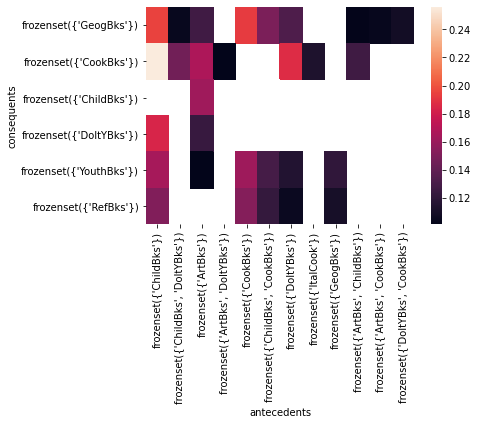

In [28]:
# Generate heatmap
sns.heatmap(support_table)

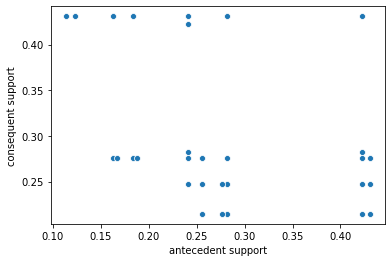

In [29]:
sns.scatterplot(x="antecedent support", y="consequent support", data=rules_no_redudancy)

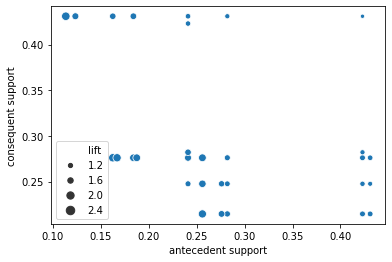

In [30]:
#adding a third Matrix
sns.scatterplot(x="antecedent support", y="consequent support",
size="lift", data=rules_no_redudancy)